# **PROJECT NAME - NYC TAXI TRIP TIME PREDICTION**

##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **NAME -**            Vinay

# **Project Summary -**

The aim of this machine learning project is to develop a predictive model for estimating trip durations in the New York City (NYC) taxi system. Accurate predictions of trip durations can greatly enhance the efficiency of the system, enabling drivers to plan routes more effectively and passengers to estimate arrival times. The project utilized a comprehensive dataset of historical trip records, encompassing various features such as pickup and drop-off timestamps, geographical coordinates, passenger counts, and trip distances.

The project began with the collection and exploration of the dataset obtained from NYC's taxi and limousine commission. Preprocessing steps were performed to remove outliers, handle missing values, and eliminate irrelevant variables. Statistical summaries and visualizations were then used to gain insights into the dataset's characteristics and identify potential patterns.

To improve the predictive capabilities of the model, feature engineering techniques were employed. This involved leveraging domain knowledge and creativity to engineer informative features. Examples of engineered features included day of the week, time of day, average speed, and directionality. External data, such as weather conditions, were also incorporated to capture additional factors that may influence trip durations.

For model development, a supervised learning approach was adopted, with the goal of training a regression model capable of predicting trip durations based on the available features. Several machine learning algorithms, including linear regression, decision trees, random forests, and gradient boosting, were experimented with. The dataset was split into training and testing sets to evaluate model performance using metrics such as mean absolute error (MAE) and root mean square error (RMSE).

Model evaluation and hyperparameter tuning were crucial steps in ensuring robust performance. Baseline performance was established by comparing the model's results with simple heuristics, such as average trip duration. Hyperparameters of different models were fine-tuned using techniques like grid search and cross-validation to achieve optimal performance. The focus was on minimizing MAE and RMSE to ensure accurate predictions.

The results of the project demonstrated the effectiveness of the developed model in predicting NYC taxi trip durations. The model outperformed the baseline heuristic, providing reliable and accurate predictions. The feature engineering process played a significant role in improving model performance by capturing important spatiotemporal patterns present in the data.

# **GitHub Link -**

https://github.com/vinay122002/NYC_TAXI_TIME

# **Problem Statement**

* The objective of this project is to build a robust and reliable predictive model that can handle different time periods, varying traffic conditions, and other factors that impact the duration of a taxi trip. By accurately predicting trip durations, we aim to improve customer satisfaction, optimize resource allocation, and contribute to more efficient transportation planning in the city.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# importing libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [ ]:
# model library :
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_squared_log_error
import lightgbm as lgb
import xgboost as xgb
from sklearn.cluster import KMeans

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/NYC Taxi Data.csv")

In [ ]:
#reading dataset :
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(1458644, 11)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


#### Missing Values/Null Values

In [ ]:
# missing valuse or null values count :
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

### What did you know about your dataset?

* Observing we see that initially there is no missing data in the training dataset
* There are 11 features including trip duration
* out of 11 features 4 are floats, 4 are object and 3 are integer data types.
* There are 1458644 rows.






## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [ ]:
# describing dataset :
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


### Variables Description

* The columns are id, vendor_id, pickup_datetime, dropoff_datetime,passenger_count, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, store_and_fwd_flag, trip_duration.

* From the 11 columns vender_id, passenger_count, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, trip_duration are numeric variables  and leftovers are categorical variables.


* Other then "trip_duration" all are independent  variable.

* Here we can see that there are sum outliers in the dataset as we can see that in the passenger_count column the minimum value is 0 but it is not posible. movng forward we will be dealing with the outliers.


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# converting the data types :
df['pickup_datetime'] = pd.to_datetime(df["pickup_datetime"])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

In [ ]:
# EXTRACTING NEW FEATURES :
def feature_creation(df):
    df['distance'] = 1000*np.sqrt(((df['pickup_latitude']-df['dropoff_latitude'])*111.1)**2+ ((df['pickup_longitude']-df['dropoff_longitude'])*111.1)**2)
    df['hour_pickup'] = df['pickup_datetime'].dt.hour
    df['day_week_pickup'] =df['pickup_datetime'].dt.dayofweek
    df['month_pickup'] = df['pickup_datetime'].dt.month

    return df
df = feature_creation(df)

In [ ]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,hour_pickup,day_week_pickup,month_pickup
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1964.196838,17,0,3
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2272.650922,0,6,6
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6658.645114,11,1,1
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1492.984635,19,2,4
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1187.611073,13,5,3


In [ ]:
# discribong dataset :
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,distance,hour_pickup,day_week_pickup,month_pickup
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02,3.942086e+03,1.360648e+01,3.050375e+00,3.516818e+00
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03,5.107053e+03,6.399693e+00,1.954039e+00,1.681038e+00
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02,1.398130e+03,9.000000e+00,1.000000e+00,2.000000e+00
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02,2.357177e+03,1.400000e+01,3.000000e+00,4.000000e+00
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03,4.267223e+03,1.900000e+01,5.000000e+00,5.000000e+00
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06,1.243498e+06,2.300000e+01,6.000000e+00,6.000000e+00




* **Based on this information, some outliers are visible in the features: 'passenger_count', 'trip_duration', 'distance'**

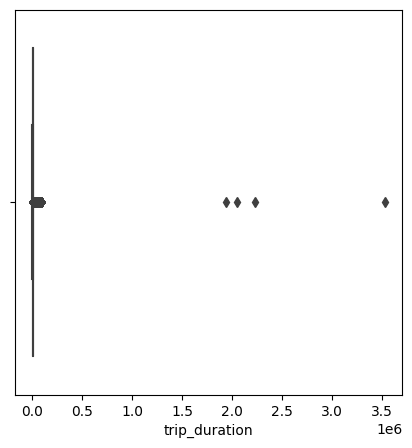

In [ ]:
# visualizing outliers:

plt.figure(figsize=(5,5))
sns.boxplot(data = df, x = "trip_duration")
plt.show()

In [ ]:
# removing data with trip_duration above 59900 seconds and less than 20 seconds :
df = df[df['trip_duration']<59900]
df = df[df['trip_duration']>20]

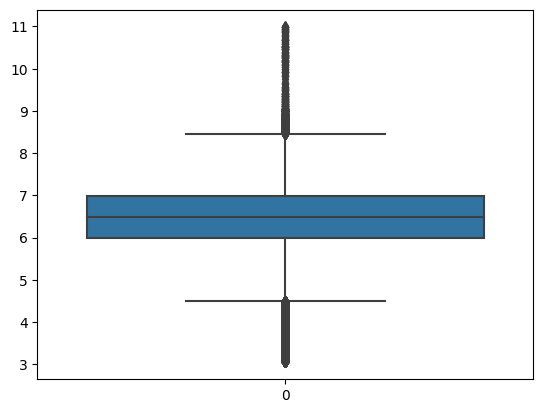

In [ ]:
# visualizing using log :
sns.boxplot(np.log(df['trip_duration'].values))
plt.show()

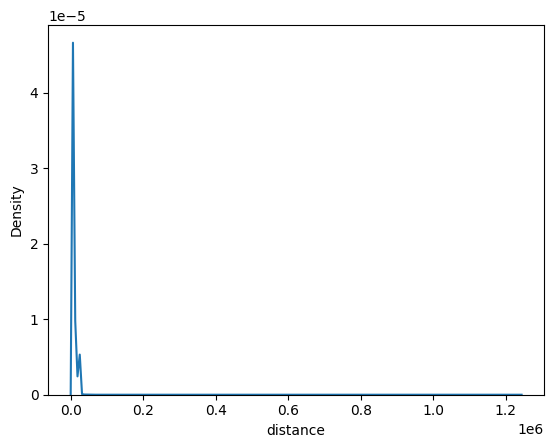

In [ ]:
# checking outliers in distance colunm:
sns.kdeplot(df['distance'])
plt.show()

In [ ]:
# removing outleiers:
df = df[df['distance']>20]

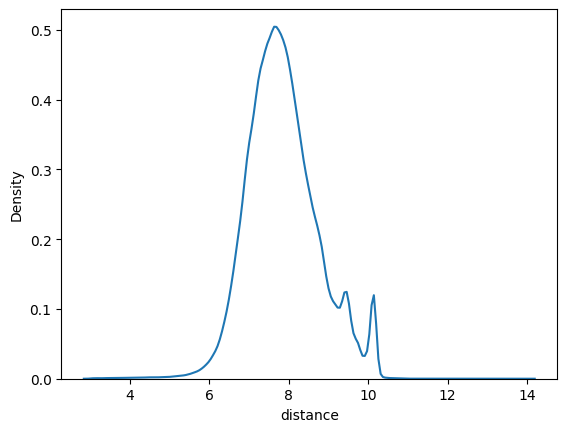

In [ ]:
# visualizing affter removing outliers:
sns.kdeplot(np.log(df['distance']))
plt.show()

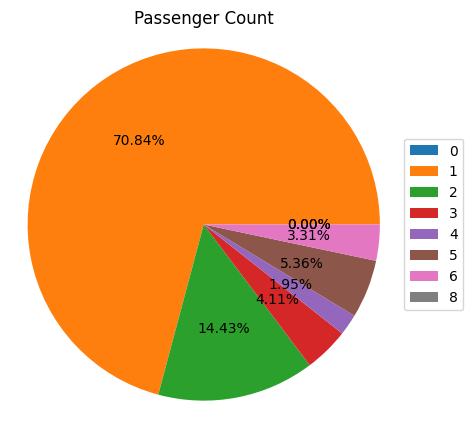

In [ ]:
# visualizing passengers data :

passengers =  df.groupby(['passenger_count'])['passenger_count'].count()
labels =passengers.index

plt.subplots(figsize=(5, 5))
plt.title("Passenger Count")
plt.pie(passengers.values,autopct='%1.2f%%', radius=3)
plt.legend( labels, loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.axis('equal')
plt.show()

In [ ]:
# remiving outliers:
df = df[df['passenger_count']>0]

### What all manipulations have you done and insights you found?

* Firstly i converted the pickup_datetime and dropoff_datetime columns into datetime format from object.

* Then i created new features such as distance, hour_pickup, day_week_pickup, month_pickup.

* By describing the features i got several insight such as

*  The average number of passengers per trip is 1 to 2, with some missing or incorrectly filled records. The highest number of passengers observed was 9, suggesting limousine trips with a larger group.

*  On average, the duration of a trip is 959.49 seconds, approximately 16 minutes. However, there is an inconsistent value of 1 second, which is too short for a trip. The longest trip duration recorded was approximately 41 days (3.526*10^6 seconds), indicating inconsistent data.

*  The average distance traveled per trip is 3.94 km. Some trips have a distance value of 0, indicating either non-occurrence or trips with the same departure and destination. The longest recorded trip had a distance of 1243.4 km, which could be a recording error due to its unusually high value.

* The data covers the months between January and June, indicated by the range of 'month_pickup' values from 1 to 6. This timeframe represents the analyzed year for the given data.

* Lastly to make data ready for analysis outliers were removed from the columns.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

# **Exploratory Data Analysis (EDA)**

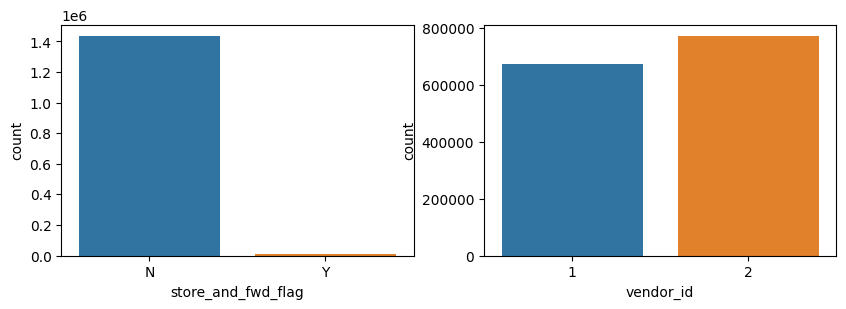

In [ ]:
# checking the count of vender_id and store_and_fwd_flag:

fig, axes = plt.subplots(1, 2, figsize=(10, 3), sharey=False)
sns.countplot(x = df['store_and_fwd_flag'],ax = axes[0])
sns.countplot(x = df['vendor_id'], ax = axes[1])
plt.show()

* Note that for the 'store_and_fwd_flag' feature there are some records where the trip took place without internet access. Therefore it is necessary to check whether the 'trip_duration' or 'distance' have inconsistent values based on this variable.

* From the graph of 'vendor_id' it can be seen that this feature is well balanced, but has a larger amount of id 2.

* For a better visualization of the data the features 'distance' and 'trip_duration' will be represented in logarithmic format

In [ ]:
df["distance_log"] = np.log(df['distance'])
df['trip_duration_log'] = np.log(df['trip_duration'])

<Axes: xlabel='passenger_count'>

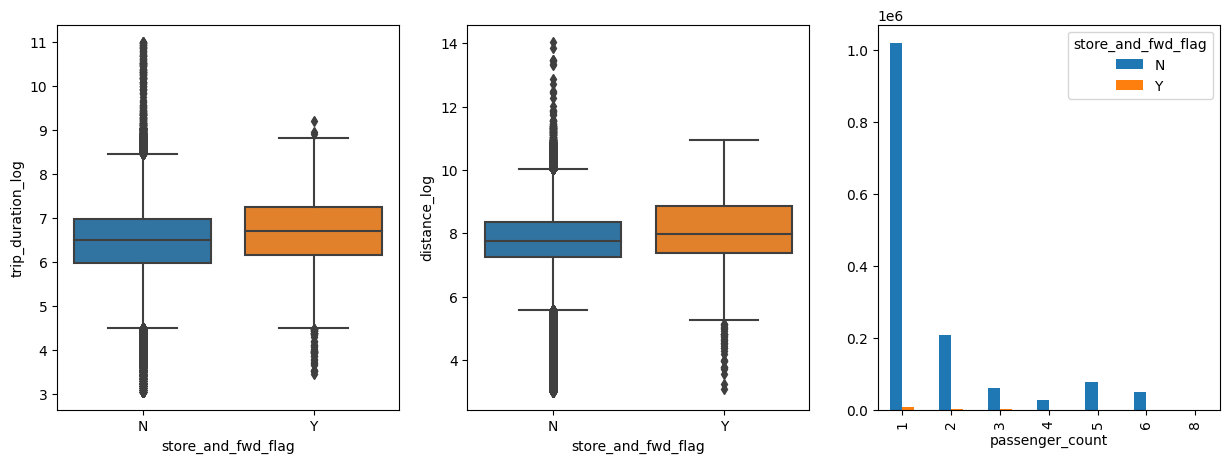

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=False)
sns.boxplot(data = df,y='trip_duration_log', x  = 'store_and_fwd_flag', ax = axes[0])
sns.boxplot(data = df,y='distance_log', x  = 'store_and_fwd_flag', ax = axes[1])
df.groupby(['passenger_count']).store_and_fwd_flag.value_counts().unstack().plot.bar( ax = axes[2])

* From the graphs there is a small difference between stored and non-stored trips, but it is not very expressive. Trips stored due to lack of internet access are made up of trips made with up to 2 people.

<Axes: xlabel='passenger_count'>

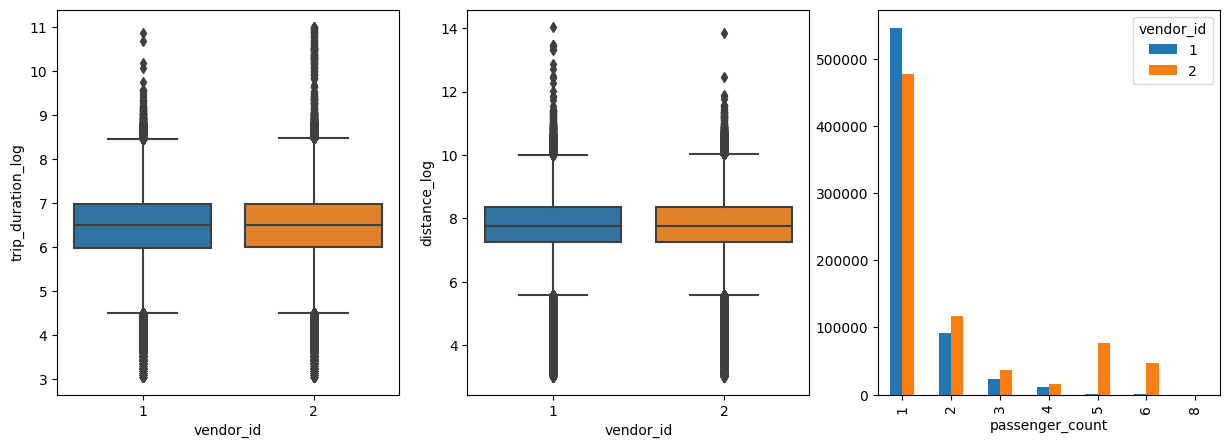

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=False)
sns.boxplot(data = df,y='trip_duration_log', x  = 'vendor_id', ax = axes[0])
sns.boxplot(data = df,y='distance_log', x  = 'vendor_id', ax = axes[1])
df.groupby(['passenger_count']).vendor_id.value_counts().unstack().plot.bar( ax = axes[2])

* From the graphs, it is not possible to identify a difference in the distribution of data from 'vendor_id' related to 'trip_duration_log' and 'distance_log'.

* Note that vendor 1 handles trips for up to 4 people, while vendor 2 handles trips for any number of people. Based on this it is possible to conclude that vendor id 1 is a taxi and vendor id 2 is a limousine

<Axes: xlabel='day_week_pickup', ylabel='count'>

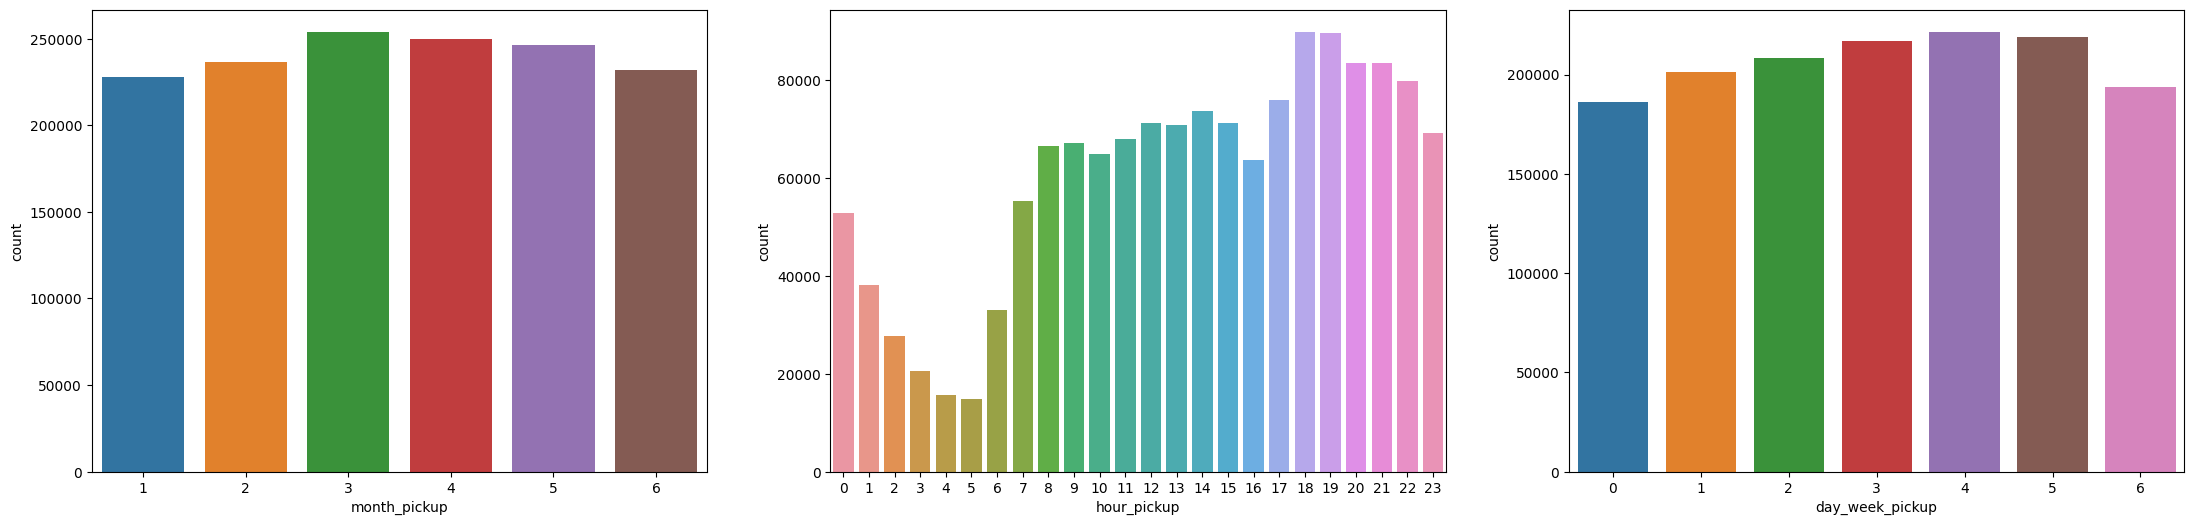

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(27, 6), sharey=False)
sns.countplot(x = df['month_pickup'], ax=axes[0])
sns.countplot(x = df['hour_pickup'], ax=axes[1])
sns.countplot(x = df['day_week_pickup'], ax=axes[2])

* From the graph of the months, it can be seen that all months have values close to the amount of data, with the lowest value in January and the highest in March.

* From the boarding time chart, it can be seen that few trips take place between 0:00 am and 5:00 am and that many trips take place between 6:00 pm and 10:00 pm.

* From the day week pickup graph, it is possible to observe that the days of the week do not have a relevant difference in the amount of data. Monday and Sunday are the days with the fewest trips and Saturday and Friday are the days with the most trips.

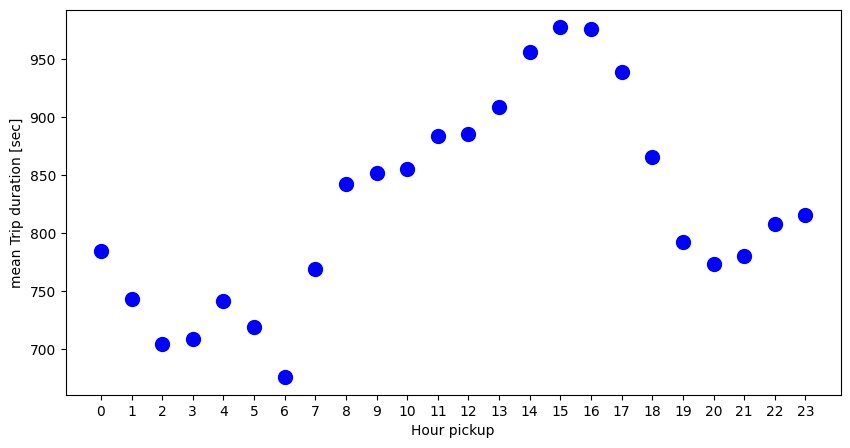

In [ ]:
# comparing pickup_hour and trip_duration :
plt.figure(figsize=(10,5))
plt.scatter(x = df.groupby(['hour_pickup'])['trip_duration'].mean().index,y = df.groupby(['hour_pickup'])['trip_duration'].mean(),s=100, color = 'b')
plt.xticks(df.groupby(['hour_pickup'])['trip_duration'].mean().index)
plt.ylabel('mean Trip duration [sec]')
plt.xlabel('Hour pickup');
plt.show()

* From the graph it is possible to see that the trips made between 1 pm and 5 pm have an average duration greater than 900 seconds, being the period that has an average greater than all other times. This may indicate that this period is the time of greatest traffic in this city.

* Trips made between 2 am and 6 am have the lowest average trip duration.

* Trips made between 23:00 and 05:00 seem to have a decreasing relation of trip duration with the passage of time.

* Between the period from 6:00 am to 1:00 pm there is a gradual increase in the average duration of the trip.

* Between the period from 17:00 to 19:00 there is a gradual decrease in the average duration of the trip.

* Based on these characteristics, it is possible to infer that this feature has important characteristics that may be relevant when building the model for predicting the 'trip_duration'.

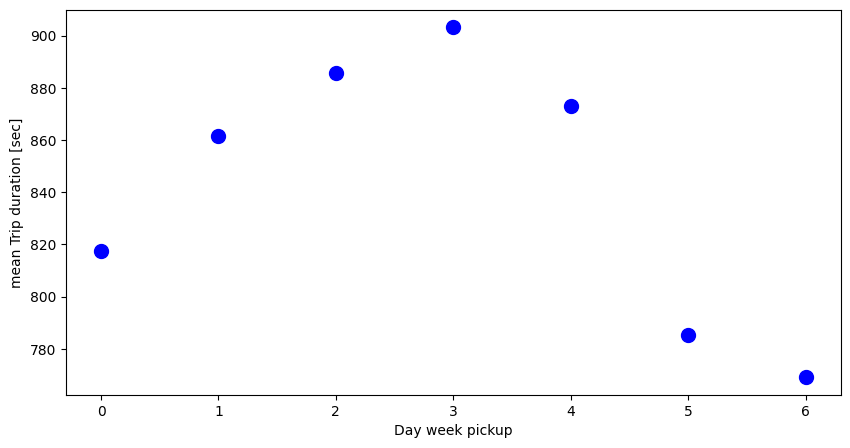

In [ ]:
# creating scatter plot for week_pickup :
plt.figure(figsize=(10, 5))
plt.scatter(x=df.groupby(['day_week_pickup'])['trip_duration'].mean().index, y = df.groupby(['day_week_pickup'])['trip_duration'].mean(),s=100, color = 'b')
plt.xticks(df.groupby(['day_week_pickup'])['trip_duration'].mean().index)
plt.ylabel('mean Trip duration [sec]')
plt.xlabel('Day week pickup');
plt.show()

* It is possible to identify an increasing relationship between the trip duration average and the days from Monday to Thursday.

* It is possible to identify a decreasing relationship between the trip duration average and the days from Thursday to Sunday.

* The days with the lowest average trip duration values are the weekends. This could be because the weekends are less busy or because on weekends the taxi and limousine systems are more used at off-peak times.

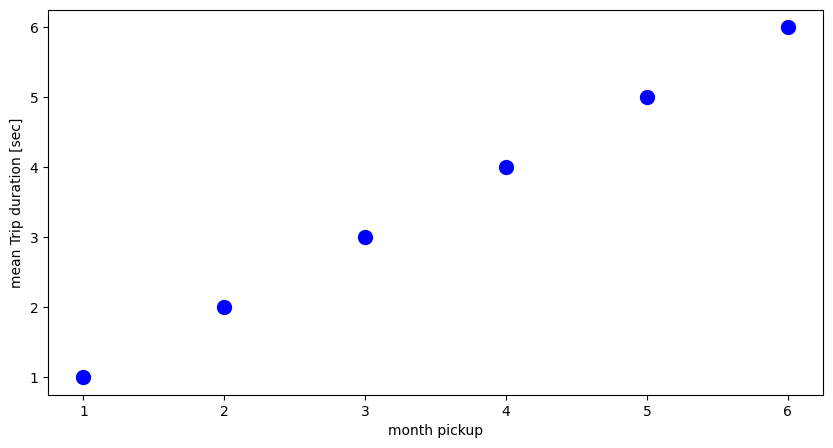

In [ ]:
# creating scatter plot for month_pickup :
plt.figure(figsize=(10,5))
plt.scatter(df.groupby(['month_pickup'])['trip_duration'].mean().index, y = df.groupby(['month_pickup'])['trip_duration'].mean().index,s=100, color = 'b')
plt.ylabel('mean Trip duration [sec]')
plt.xlabel('month pickup');
plt.show()

* There is an increasing linear relationship between the months and the average value of the duration of trips.

* As the one-year cycle for data analysis was not completed, it may be that this information is not as relevant, as this may be a cyclical effect and not a growing effect over the months.

# Corelation :

In [ ]:
# making data ready for heatmap:
data = df.drop(columns=['trip_duration_log'])
corr_pearson = data.corr(method = 'pearson')


<ipython-input-33-461e634b2a3c>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_pearson = data.corr(method = 'pearson')


<Axes: >

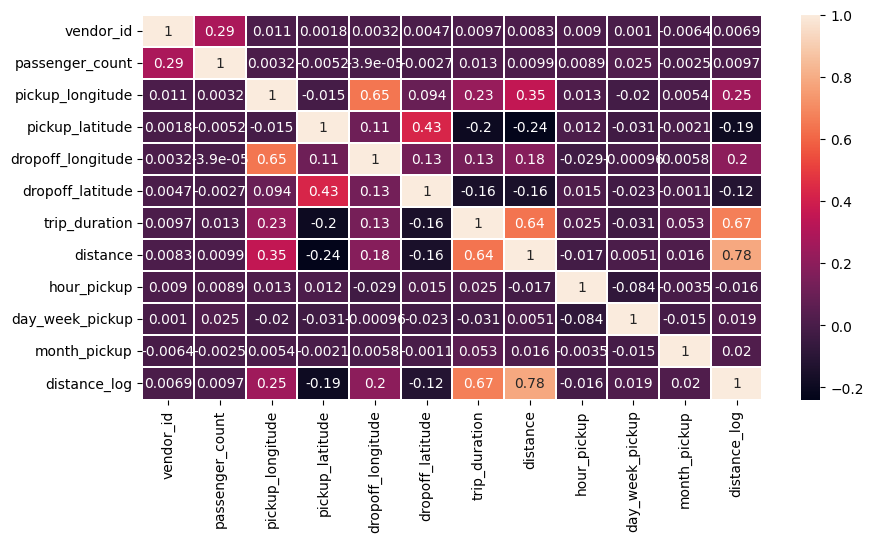

In [ ]:
# heatmap
fig, axes = plt.subplots(1, figsize=(10,5))
sns.heatmap(corr_pearson, annot=True,linewidths=.1)

* In order to avoid multicollinearity problems, we will be using pearsons correlation. As there is not a very clear literature for 'acceptable' correlation values that avoid multicollinearity, values greater than 0.8 of correlation will be defined as cutoff values to be removed.

* Examining Pearson's  correlation, it can be seen that no correlation values are greater than the cut-off value initially defined, therefore no variable will be removed.

# **MODEL IMPLIMENTAION :**

* Before applying the regression model, the normalization of non-categorical data will be applied, aiming to increase the performance of the model and prevent the algorithm from becoming biased towards variables with a higher order of magnitude.

* During model learning, the cross-validation method will be applied, in order to evaluate the generalization of the model.

In [ ]:
# SCALING MODEL:
scaler = MinMaxScaler()
label_encoder = LabelEncoder()
df.index = range(len(df.index))
cols1 = ['vendor_id','store_and_fwd_flag']
cols2 = ['passenger_count','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','distance_log','hour_pickup','day_week_pickup','month_pickup']
train_scaler = pd.DataFrame(scaler.fit_transform(df.loc[:,cols2]), columns = cols2)
df['store_and_fwd_flag'] = label_encoder.fit_transform(df['store_and_fwd_flag'])
df_train_scaler = pd.concat([train_scaler, df.loc[:,cols1]], axis=1)

In [ ]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,hour_pickup,day_week_pickup,month_pickup,distance_log,trip_duration_log
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,455,1964.196838,17,0,3,7.582839,6.120297
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,663,2272.650922,0,6,6,7.728702,6.496775
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,6658.645114,11,1,1,8.803671,7.661056
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,429,1492.984635,19,2,4,7.308533,6.061457
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,435,1187.611073,13,5,3,7.079699,6.075346


In [ ]:
# dataset spliting :
x = df_train_scaler
y = df['trip_duration_log']
kf = KFold(n_splits = 5, shuffle = False)
x_train,x_test,y_train,y_test = train_test_split(X, y,test_size=.2,random_state =0)

### **1. Model LinearRegression :**


In [ ]:
# model implimentation :
lin_model = LinearRegression()
lin_model.fit(x_test,y_test)
y_pred = lin_model.predict(x_test)


In [ ]:
# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)


Mean Squared Error (MSE): 0.19753239199319758
R-squared (R2) Score: 0.6405272961602699


### **2. Random Forest Regression (Ensemble) :**

In [ ]:
#Hyperperameter tuning :
rfr = RandomForestRegressor(max_depth=100,random_state = 1, n_estimators = 100
                            )
rfr.fit(x_test,y_test)
y_pred1 = rfr.predict(x_test)

In [ ]:
# Evaluation metrics
mse = mean_squared_error(y_test, y_pred1)

r2 = r2_score(y_test, y_pred1)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 0.017136772685030412
R-squared (R2) Score: 0.9688142185187184


### **3. Gradient Boosting Regression:**

In [ ]:
# using Gradient boosting regressor
gb_regressor = GradientBoostingRegressor(n_estimators=100, random_state=0)
gb_regressor.fit(x_train, y_train)
y_pred2 = gb_regressor.predict(x_test)

In [ ]:
# Evaluation metrics
mse = mean_squared_error(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 0.14581172904553216
R-squared (R2) Score: 0.7346494113565507
